# This notebook is to plot the OMEGA regression on NTA and CTI index for each model

In [1]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
from itertools import cycle
import cftime

from cmip_postprocess import *

2025-02-03 10:43:33.148928


In [2]:
Hadley_SST2 = '../data/raw/HadISST.0-360.nc'

MMF_PATH  = '../data/raw/E3SM-MMF_1950-2015_Regrid180x360.nc'
E3SM_PATH = '../data/raw/E3SM_1950-2015_regrid180x360.nc'
ERA5_PATH = '../data/raw/era5_slp_monthly_ave.nc'
SSTA_INDEX_PATH = '../data/processed/SSTA_INDEX/index/'


ERA5_OMEGA = '../data/raw/era5_pl_omega.nc'

CMIP6_TS_PATH = '../data/raw/ts/'
CMIP6_MODLES = '../data/raw/source_id.txt'
CMIP6_PATH = '../data/raw/'

nta_region = {'nta': ([280, 360], [5, 25])} 
sim_timeslice = slice('1950-01-01', '2014-12-01')


In [3]:
def get_input_names(cmip_path=None, cmip_model=None):
    with open(cmip_model, "r") as f:
        lines = f.readlines()
    fns_list = [line.strip() for line in lines]
    in_fns = [cmip_path + in_fn for in_fn in fns_list]
    return fns_list, in_fns

models, in_fns = get_input_names(CMIP6_PATH, CMIP6_MODLES)



## Load the lpf_cmip_ano_omega and nta_index

In [4]:
# I have calculate the low_pass_filtered OMEGA for all CMIP6 models and load them directly here.
# The calculation processof lpf_cmip_ano_omega follows the SSTA. 
lpf_cmip_ano_omega = load_from_pickle('../data/processed/lpf_cmip_ano_omega.pkl')
nta_index = load_from_pickle(SSTA_INDEX_PATH + 'nta_ssta.pkl') 


In [5]:
for model, ds in lpf_cmip_ano_omega.items():
    if model in ['E3SMv2', 'E3SM-MMF', 'ERA5']:
        print(model, ds.lev.values.shape)
    else:
        print(model, ds.plev.values.shape)



CESM2-WACCM.gn.historical.Amon.r1i1p1f1.ts (19,)
CESM2-WACCM-FV2.gn.historical.Amon.r1i1p1f1.ts (19,)
CESM2-FV2.gn.historical.Amon.r1i1p1f1.ts (19,)
CESM2.gn.historical.Amon.r1i1p1f1.ts (19,)
TaiESM1.gn.historical.Amon.r1i1p1f1.ts (19,)
GISS-E2-1-H.gn.historical.Amon.r1i1p1f1.ts (19,)
BCC-ESM1.gn.historical.Amon.r1i1p1f1.ts (19,)
NESM3.gn.historical.Amon.r1i1p1f1.ts (19,)
GISS-E2-1-G-CC.gn.historical.Amon.r1i1p1f1.ts (19,)
CanESM5.gn.historical.Amon.r1i1p1f1.ts (19,)
BCC-CSM2-MR.gn.historical.Amon.r1i1p1f1.ts (19,)
GISS-E2-1-G.gn.historical.Amon.r1i1p1f1.ts (19,)
MPI-ESM-1-2-HAM.gn.historical.Amon.r1i1p1f1.ts (19,)
MPI-ESM1-2-LR.gn.historical.Amon.r1i1p1f1.ts (19,)
NorESM2-MM.gn.historical.Amon.r1i1p1f1.ts (19,)
IITM-ESM.gn.historical.Amon.r1i1p1f1.ts (19,)
MRI-ESM2-0.gn.historical.Amon.r1i1p1f1.ts (19,)
CMCC-CM2-SR5.gn.historical.Amon.r1i1p1f1.ts (19,)
FGOALS-g3.gn.historical.Amon.r1i1p1f1.ts (19,)
ACCESS-CM2.gn.historical.Amon.r1i1p1f1.ts (19,)
MPI-ESM1-2-HR.gn.historical.Amon.r1i1p1

In [6]:
model_names = [model.split('.')[0] for model in list(lpf_cmip_ano_omega.keys())]

# Create a dictionary to hold the regression results for each model
regression_omega_ano_nta = {}

# Loop over each model and calculate the regression
for model, nta_ds, omega_ano_ds in zip(lpf_cmip_ano_omega.keys(), 
                                 nta_index['lpf_data'].values(), 
                                 lpf_cmip_ano_omega.values()):
    
    omega_ano_ds = omega_ano_ds.mean(dim='lat')
    model = model.split('.')[0] # get cmip model names
    if len(nta_ds.time) != len(omega_ano_ds.time):
        nta_ds = nta_ds.sel(time=slice('1955-01', '2009-11'))
                          
    print('Starting regression for', model)
    if model in ['ERA5']:
        regression_omega_ano_nta[model] = calculate_regression_vectorize(nta_ds.sel(time=slice('1955', '2009')), 
                                                            omega_ano_ds)
    else:
        regression_omega_ano_nta[model] = calculate_regression_vectorize(nta_ds, 
                                                                omega_ano_ds)


Starting regression for CESM2-WACCM
Starting regression for CESM2-WACCM-FV2
Starting regression for CESM2-FV2
Starting regression for CESM2
Starting regression for TaiESM1
Starting regression for GISS-E2-1-H
Starting regression for BCC-ESM1
Starting regression for NESM3
Starting regression for GISS-E2-1-G-CC
Starting regression for CanESM5
Starting regression for BCC-CSM2-MR
Starting regression for GISS-E2-1-G
Starting regression for MPI-ESM-1-2-HAM
Starting regression for MPI-ESM1-2-LR
Starting regression for NorESM2-MM
Starting regression for IITM-ESM
Starting regression for MRI-ESM2-0
Starting regression for CMCC-CM2-SR5
Starting regression for FGOALS-g3
Starting regression for ACCESS-CM2
Starting regression for MPI-ESM1-2-HR
Starting regression for CAMS-CSM1-0
Starting regression for AWI-ESM-1-1-LR
Starting regression for CMCC-ESM2
Starting regression for SAM0-UNICON
Starting regression for MIROC6
Starting regression for CMCC-CM2-HR4
Starting regression for E3SM-MMF
Starting regres

In [9]:
# Extract ERA5 and E3SMv2 data
era5_omega = regression_omega_ano_nta['ERA5']['slope']
e3sm_omega = regression_omega_ano_nta['E3SMv2']['slope']

# Calculate mean absolute values
era5_mag = np.abs(era5_omega).mean().values
e3sm_mag = np.abs(e3sm_omega).mean().values

# Calculate relative difference
relative_diff = (e3sm_mag - era5_mag) / era5_mag * 100

print(f"ERA5 mean magnitude: {era5_mag:.6f} Pa/s")
print(f"E3SMv2 mean magnitude: {e3sm_mag:.6f} Pa/s")
print(f"Relative difference: {relative_diff:.2f}%")

# For specific regions comparison
# For example, Pacific region
lon_range = slice(180, 270)  # Pacific region
era5_pacific = np.abs(era5_omega.sel(lon=lon_range)).mean().values
e3sm_pacific = np.abs(e3sm_omega.sel(lon=lon_range)).mean().values
pacific_diff = (e3sm_pacific - era5_pacific) / era5_pacific * 100

print(f"\nPacific region:")
print(f"ERA5 mean magnitude: {era5_pacific:.6f} Pa/s")
print(f"E3SMv2 mean magnitude: {e3sm_pacific:.6f} Pa/s")
print(f"Relative difference: {pacific_diff:.2f}%")

ERA5 mean magnitude: 0.004927 Pa/s
E3SMv2 mean magnitude: 0.002266 Pa/s
Relative difference: -54.00%

Pacific region:
ERA5 mean magnitude: 0.004384 Pa/s
E3SMv2 mean magnitude: 0.002194 Pa/s
Relative difference: -49.96%


In [7]:
model_ranking = pd.read_csv('/global/homes/y/yanxia/ENSO-CLOUD/CMIP/For_paper/tables/model_ranking.csv')
# Sort model_ranking by Distance in descending order
model_ranking = model_ranking.sort_values('Distance', ascending=True)

# Create ordered dictionary
regression_omega_ano_nta_ordered = {}

# First add observational data
if 'ERA5' in regression_omega_ano_nta:
    regression_omega_ano_nta_ordered['ERA5'] = regression_omega_ano_nta['ERA5']

# Add model data in descending order of Distance
for model in model_ranking['Unnamed: 0']:
    if model in regression_omega_ano_nta:
        regression_omega_ano_nta_ordered[model] = regression_omega_ano_nta[model]
# Replace original dictionary with ordered one
regression_omega_ano_nta = regression_omega_ano_nta_ordered

In [8]:
list(regression_omega_ano_nta.keys())

['ERA5',
 'CanESM5',
 'E3SMv2',
 'AWI-ESM-1-1-LR',
 'CESM2-WACCM',
 'MPI-ESM-1-2-HAM',
 'ACCESS-CM2',
 'BCC-ESM1',
 'IITM-ESM',
 'MPI-ESM1-2-HR',
 'CMCC-CM2-HR4',
 'MIROC6',
 'CESM2',
 'BCC-CSM2-MR',
 'TaiESM1',
 'MRI-ESM2-0',
 'CESM2-WACCM-FV2',
 'GISS-E2-1-G-CC',
 'CESM2-FV2',
 'CAMS-CSM1-0',
 'CMCC-CM2-SR5',
 'MPI-ESM1-2-LR',
 'GISS-E2-1-H',
 'CMCC-ESM2',
 'NESM3',
 'GISS-E2-1-G',
 'FGOALS-g3',
 'E3SM-MMF',
 'SAM0-UNICON',
 'NorESM2-MM']

In [15]:
# please plot the mmf for trop and nh and sh using subplot
def convert_to_hPa(tick_value, pos):
        return int(tick_value / 100)

def plot_wind_profile(ds, var='slope', vmin=-0.8, vmax=0.8, interval=0.05, left_title=None, right_title=None, central_title=None, threshold= 0.2):   
    
    fig, ax = plt.subplots(figsize=(15, 6), dpi=200)


    if 'plev' in ds.dims:
        ds = ds.rename({'plev': 'lev'})
        ax.yaxis.set_major_formatter(plt.FuncFormatter(convert_to_hPa))
        # if cmip model, please make the y-axis pressure in hPa
        ax.yaxis.set_major_formatter(plt.FuncFormatter(convert_to_hPa))
        y_position = 950*100
        ax.text(55, y_position, 'Indian', fontsize=20, fontweight='bold')
        ax.text(130, y_position, 'WP', fontsize=20, fontweight='bold')
        ax.text(220, y_position, 'CEP', fontsize=20, fontweight='bold')
        ax.text(300, y_position, 'Atlantic', fontsize=20, fontweight='bold')
    else:
        # if reanalysis,do not change the y-axis pressure
        y_position = 950
        ax.text(55, y_position, 'Indian', fontsize=20, fontweight='bold')
        ax.text(130, y_position, 'WP', fontsize=20, fontweight='bold')
        ax.text(220, y_position, 'CEP', fontsize=20, fontweight='bold')
        ax.text(300, y_position, 'Atlantic', fontsize=20, fontweight='bold')
        
    levels = np.arange(vmin, vmax+interval, interval)
    cf = ax.contourf(ds['lon'], ds['lev'], ds[var].values, cmap='RdBu_r', levels=levels, extend='both')
    # please plot all the values in the levels, not use contourf, use imshow

    cbar = plt.colorbar(cf, ax=ax, pad=0.02, extend='both')
    cbar.ax.tick_params(labelsize=14)  # Set colorbar label size
    # cbar.set_label('Correlation Coefficient', fontsize=14, fontweight='bold') 
    cbar.set_label('Regression Coefficient (Pa/s)', fontsize=14, fontweight='bold') 
    plt.title(left_title, loc='left', fontweight='bold')
    plt.title(right_title, loc='right',fontweight='bold')
    plt.title(central_title, loc='center',fontweight='bold')

    
 
    # please add text for the region, Atlantic, Pacific, Indian for their corresponding longitudes
    # Atlantic region from 280-360, Pacific region from 100-240, Indian region from 30-100
    # For Pacific, WP from 120-180, CP from 180-210, EP from 210-240 
    # Add these text along the x-axis 

    ax.axvline(30, color='k', linestyle='--')
    ax.axvline(110, color='k', linestyle='--')
    ax.axvline(180, color='k', linestyle='--')
    ax.axvline(280, color='k', linestyle='--')


    ax.set_xlabel('Longitude', fontsize=20)
    ax.set_ylabel('Pressure (hPa)', fontsize=20)





    # ax.set_ylim(0, 1000)
    ax.invert_yaxis()
    # ax.grid(True)
    # please make the ticks width larger, linewidth=2
    ax.tick_params(axis='both', which='major', labelsize=20, width=3)
    ax.tick_params(axis='both', which='minor', labelsize=20, width=3)

    ax.set_xlim(0, 360)
    # please make the edge of the axis thicker and value text larger

    # make the x-axis number larger
    ax.xaxis.set_tick_params(width=3)
    ax.yaxis.set_tick_params(width=3)



    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(4)
        



    def plot_mask(ax, ds, threshold=0.621489):
    # create the grid points
        lons, levs = np.meshgrid(ds['lon'], ds['lev'])
        
        # create the significant mask, consider the positive and negative values
        significant_mask = np.abs(ds['r_value'].values) >= threshold
        
        # only sparse the longitude
        thinning_factor_lon = 5  # only sparse the longitude
        thin_mask = significant_mask[:, ::thinning_factor_lon]
        thin_lons = lons[:, ::thinning_factor_lon]
        thin_levs = levs[:, ::thinning_factor_lon]
        
        # plot the points in the significant region
        ax.scatter(thin_lons[thin_mask], 
                thin_levs[thin_mask],
                color='k', 
                marker='.', 
                s=3, 
                alpha=0.3)

    plot_mask(ax, ds, threshold=threshold)   

    
######################### Mask Threshold ##################################
r_threshold = 0.621489  # reference correlation based on the Pearson correlation table (df=780/120, alpha=0.1)






In [9]:
def convert_to_hPa(tick_value, pos):
    return int(tick_value / 100)

def plot_wind_profile_all_cmip6(ds_dict, var='slope', vmin=-0.025, vmax=0.025, interval=0.005, threshold=0.621489, save_fig=True, title=None, figure_name=None):
    # filter out the cmip6 models
    # cmip6_models = {k: v for k, v in ds_dict.items() if k not in ['ERA5', 'E3SM-MMF', 'E3SMv2']}
    model_names = list(ds_dict.keys())
    n_models = len(model_names)
    
    # calculate the number of rows based on 6 columns
    n_cols = 6
    n_rows = (n_models + n_cols - 1) // n_cols
    
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(30, 3*n_rows), dpi=200)
    axs = axs.flatten()
    
    for idx, (model, ds) in enumerate(ds_dict.items()):
        ax = axs[idx]
        
        if 'plev' in ds.dims:
            ds = ds.rename({'plev': 'lev'})
            ax.yaxis.set_major_formatter(plt.FuncFormatter(convert_to_hPa))
            y_position = 950*100
            ax.text(55, y_position, 'Indian', fontsize=8, fontweight='bold')
            ax.text(130, y_position, 'WP', fontsize=8, fontweight='bold')
            ax.text(220, y_position, 'CEP', fontsize=8, fontweight='bold')
            ax.text(300, y_position, 'Atlantic', fontsize=8, fontweight='bold')
        
        levels = np.arange(vmin, vmax+interval, interval)
        cf = ax.contourf(ds['lon'], ds['lev'], ds[var].values, cmap='RdBu_r', levels=levels, extend='both')
        
        ax.axvline(30, color='k', linestyle='--', linewidth=0.5)
        ax.axvline(110, color='k', linestyle='--', linewidth=0.5)
        ax.axvline(180, color='k', linestyle='--', linewidth=0.5)
        ax.axvline(280, color='k', linestyle='--', linewidth=0.5)
        
        ax.set_xlabel('Longitude', fontsize=10)
        if idx % n_cols == 0:  # only add y-axis label for the first subplot in each row
            ax.set_ylabel('Pressure (hPa)', fontsize=10)
        
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=8, width=1)
        ax.tick_params(axis='both', which='minor', labelsize=8, width=1)
        
        ax.set_xlim(0, 360)
        
        for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(1)
            
    

        ax.set_title(model, loc='left', fontweight='bold')
        ax.set_title(title, loc='right', fontweight='bold')

        # plot the significant points
        lons, levs = np.meshgrid(ds['lon'], ds['lev'])
        significant_mask = np.abs(ds['r_value'].values) >= threshold
        thinning_factor_lon = 3
        thin_mask = significant_mask[:, ::thinning_factor_lon]
        thin_lons = lons[:, ::thinning_factor_lon]
        thin_levs = levs[:, ::thinning_factor_lon]
        ax.scatter(thin_lons[thin_mask], thin_levs[thin_mask],
                  color='k', marker='.', s=3, alpha=0.6)
    
    # 隐藏多余的子图
    for idx in range(len(model_names), len(axs)):
        axs[idx].set_visible(False)
    
    # 添加colorbar
    cbar_ax = fig.add_axes([0.92, 0.15, 0.015, 0.7])
    cbar = fig.colorbar(cf, cax=cbar_ax)
    cbar.ax.tick_params(labelsize=12)
    cbar.set_label('Regression Coefficient (Pa/s)', fontsize=12, fontweight='bold')
    
    plt.tight_layout(rect=[0, 0, 0.9, 1])

    if save_fig:
        plt.savefig(figure_name, dpi=300, bbox_inches='tight')
        # plt.savefig('paper_figures/Figure_S4_regression_omega_nta_cmip6.pdf', dpi=300, bbox_inches='tight')
    return fig, axs


## Plot Individual CMIP6 Models for NTA


/tmp/ipykernel_1328783/3306679329.py:80: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


(<Figure size 6000x3000 with 31 Axes>,
 array([<AxesSubplot:title={'left':'ERA5','right':'OMEGA-NTA'}, xlabel='Longitude', ylabel='Pressure (hPa)'>,
        <AxesSubplot:title={'left':'CanESM5','right':'OMEGA-NTA'}, xlabel='Longitude'>,
        <AxesSubplot:title={'left':'E3SMv2','right':'OMEGA-NTA'}, xlabel='Longitude'>,
        <AxesSubplot:title={'left':'AWI-ESM-1-1-LR','right':'OMEGA-NTA'}, xlabel='Longitude'>,
        <AxesSubplot:title={'left':'CESM2-WACCM','right':'OMEGA-NTA'}, xlabel='Longitude'>,
        <AxesSubplot:title={'left':'MPI-ESM-1-2-HAM','right':'OMEGA-NTA'}, xlabel='Longitude'>,
        <AxesSubplot:title={'left':'ACCESS-CM2','right':'OMEGA-NTA'}, xlabel='Longitude', ylabel='Pressure (hPa)'>,
        <AxesSubplot:title={'left':'BCC-ESM1','right':'OMEGA-NTA'}, xlabel='Longitude'>,
        <AxesSubplot:title={'left':'IITM-ESM','right':'OMEGA-NTA'}, xlabel='Longitude'>,
        <AxesSubplot:title={'left':'MPI-ESM1-2-HR','right':'OMEGA-NTA'}, xlabel='Longitude'>,
     

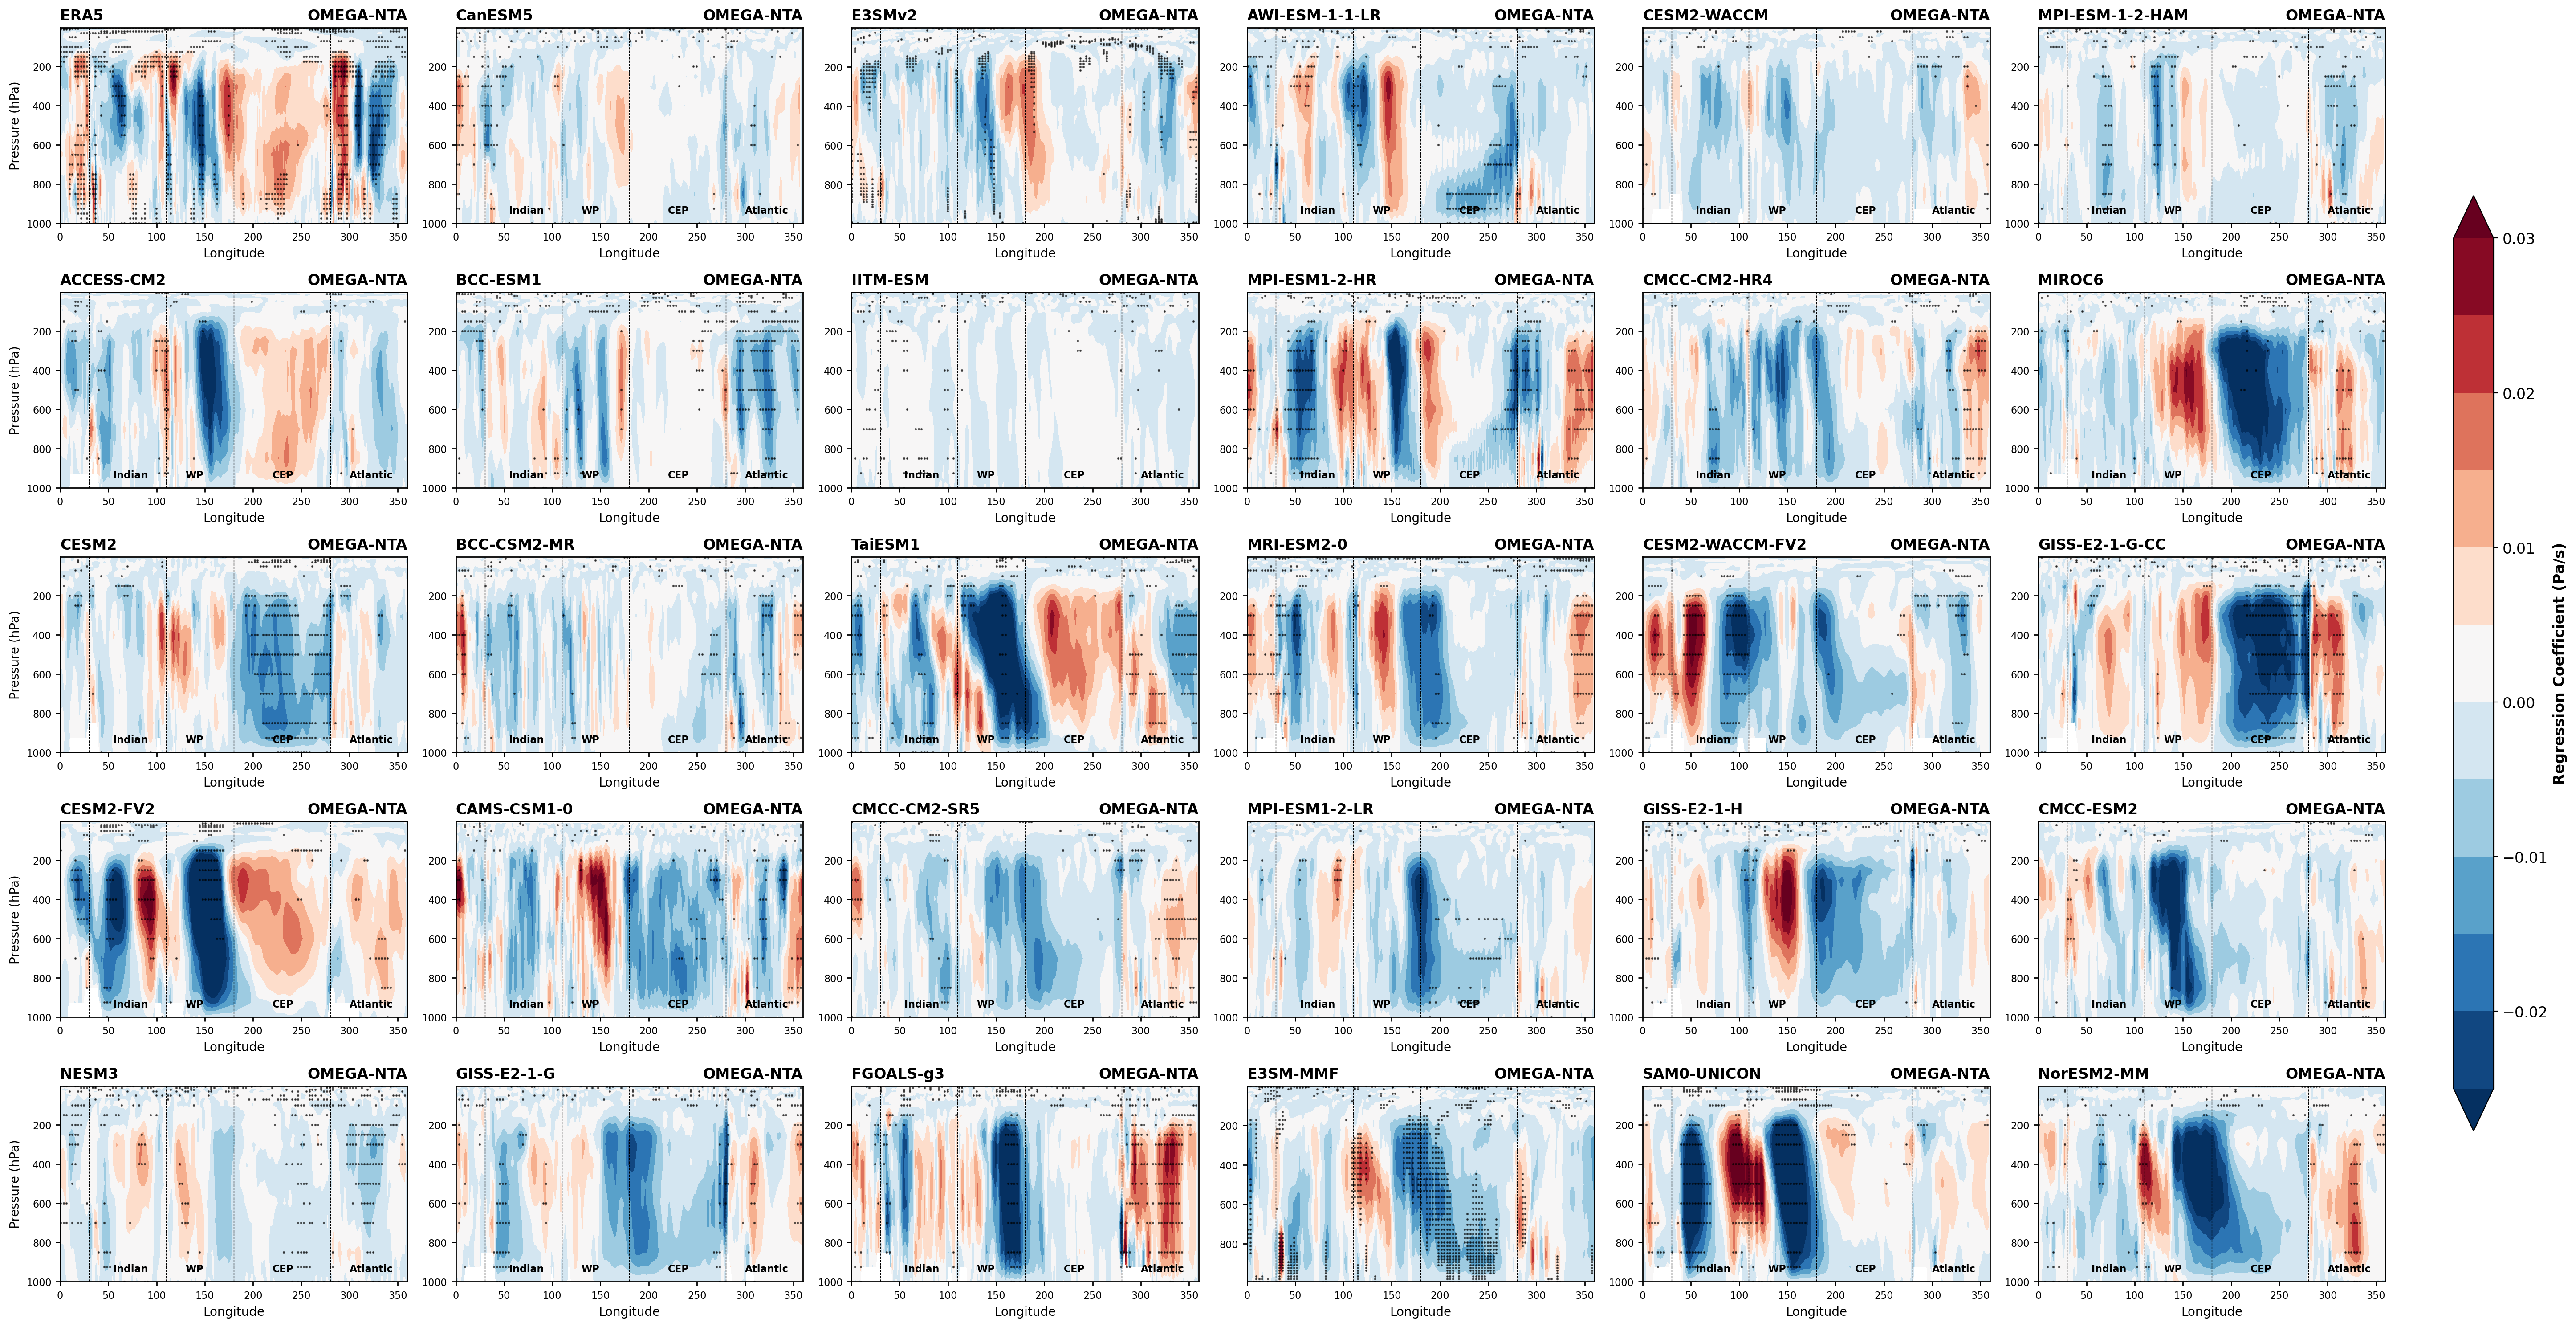

In [17]:
plot_wind_profile_all_cmip6(regression_omega_ano_nta, figure_name='paper_figures/Figure_S2_regression_omega_nta_cmip6.png', title='OMEGA-NTA')

## Plot CMIP6 Multi-Model Mean for NTA

In [11]:
lpf_cmip_mmm_omega_nta = xr.zeros_like(regression_omega_ano_nta['ACCESS-CM2'])

for model, ds in regression_omega_ano_nta.items():
    if model in ['E3SM-MMF', 'E3SMv2', 'ERA5']:
        continue
    else:
        lpf_cmip_mmm_omega_nta['slope'] += ds['slope'].values
        lpf_cmip_mmm_omega_nta['r_value'] += ds['r_value'].values

lpf_cmip_mmm_omega_nta = lpf_cmip_mmm_omega_nta / (len(lpf_cmip_ano_omega.keys())-3)


In [16]:

regression_omega_ano_nta['CMIP6-MMM'] = lpf_cmip_mmm_omega_nta
save_datasets_to_pickle(regression_omega_ano_nta, '../data/processed/regression/regression_omega_ano_nta.pkl')


In [12]:

######################### Mask Threshold ##################################
r_threshold = 0.621489  # reference correlation based on the Pearson correlation table (df=780/120, alpha=0.1)

# Function to calculate the t-value and significance for CMIP-MMM
def calculate_significance(models_data):
    r_values = np.array([data['r_value'] for model, data in models_data.items() if model not in ['E3SM-MMF', 'E3SMv2', 'ERA5']])
    
    mean_correlation = np.mean(r_values, axis=0)
    std_dev = np.std(r_values, axis=0, ddof=1)
    n = len(r_values)
    standard_error = std_dev / np.sqrt(n)
    t_value = mean_correlation / standard_error
    degrees_of_freedom = n - 1
    alpha = 0.10
    critical_t_value = stats.t.ppf(1 - alpha / 2, degrees_of_freedom)
    significance_mask = abs(t_value) > critical_t_value
    return significance_mask

# Calculate significance mask for CMIP-MMM
cmip_mmm_significance_mask = calculate_significance(regression_omega_ano_nta)

# create the grid points
lons, levs = np.meshgrid(lpf_cmip_mmm_omega_nta['lon'], lpf_cmip_mmm_omega_nta['plev'])

# create the xarray.Dataset to save the significance mask
significance_mask_ds_nta = xr.Dataset(
    {
        "significance_mask": (["plev", "lon"], cmip_mmm_significance_mask)
    },
    coords={
        "lon": lpf_cmip_mmm_omega_nta['lon'],
        "lev": lpf_cmip_mmm_omega_nta['plev']
    }
)

significance_mask_ds = xr.Dataset(
    {
        "significance_mask": (["plev", "lon"], cmip_mmm_significance_mask)
    },
    coords={
        "lon": lpf_cmip_mmm_omega_nta['lon'],
        "lev": lpf_cmip_mmm_omega_nta['plev']
    }
)



/tmp/ipykernel_1328783/654223511.py:12: RuntimeWarning: invalid value encountered in divide
  t_value = mean_correlation / standard_error


In [13]:
def plot_wind_profile_cmip(ds, left_title='CMIP6-MMM', right_title='CTI', vmin=-0.01, vmax=0.01, interval=0.001, threshold=0.621489):
    fig, ax = plt.subplots(figsize=(15, 6), dpi=200)
    if 'plev' in ds.dims:
        ds = ds.rename({'plev': 'lev'})
        ax.yaxis.set_major_formatter(plt.FuncFormatter(convert_to_hPa))
        # if cmip model, please make the y-axis pressure in hPa
        ax.yaxis.set_major_formatter(plt.FuncFormatter(convert_to_hPa))
        y_position = 950*100
        ax.text(55, y_position, 'Indian', fontsize=20, fontweight='bold')
        ax.text(130, y_position, 'WP', fontsize=20, fontweight='bold')
        ax.text(220, y_position, 'CEP', fontsize=20, fontweight='bold')
        ax.text(300, y_position, 'Atlantic', fontsize=20, fontweight='bold')
    else:
        # if reanalysis,do not change the y-axis pressure
        y_position = 950
        ax.text(55, y_position, 'Indian', fontsize=20, fontweight='bold')
        ax.text(130, y_position, 'WP', fontsize=20, fontweight='bold')
        ax.text(220, y_position, 'CEP', fontsize=20, fontweight='bold')
        ax.text(300, y_position, 'Atlantic', fontsize=20, fontweight='bold')
        
    levels = np.arange(vmin, vmax+interval, interval)
    cf = ax.contourf(ds['lon'], ds['lev'], ds['slope'].values, cmap='RdBu_r', levels=levels, extend='both')
    # please plot all the values in the levels, not use contourf, use imshow

    cbar = plt.colorbar(cf, ax=ax, pad=0.02, extend='both')
    cbar.ax.tick_params(labelsize=14)  # Set colorbar label size
    # cbar.set_label('Correlation Coefficient', fontsize=14, fontweight='bold') 
    cbar.set_label('Regression Coefficient (Pa/s)', fontsize=14, fontweight='bold') 
    plt.title(left_title, loc='left', fontweight='bold')
    plt.title(right_title, loc='right',fontweight='bold')


    ax.axvline(30, color='k', linestyle='--')
    ax.axvline(110, color='k', linestyle='--')
    ax.axvline(180, color='k', linestyle='--')
    ax.axvline(280, color='k', linestyle='--')


    ax.set_xlabel('Longitude', fontsize=20)
    ax.set_ylabel('Pressure (hPa)', fontsize=20)

    # ax.set_ylim(0, 1000)
    ax.invert_yaxis()
    # ax.grid(True)
    # please make the ticks width larger, linewidth=2
    ax.tick_params(axis='both', which='major', labelsize=20, width=3)
    ax.tick_params(axis='both', which='minor', labelsize=20, width=3)

    ax.set_xlim(0, 360)
    # please make the edge of the axis thicker and value text larger

    # make the x-axis number larger
    ax.xaxis.set_tick_params(width=3)
    ax.yaxis.set_tick_params(width=3)

    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(4)
    

    # please implement a function to the significant dots based on the r_threshold
    # which the mask region is (lon lev) region, meaning the significant dots are in the (lon, lev) space
    plot_significant_dots_cmip_mmm(ax, significance_mask_ds)


# Function to create significant mask and plot the dots for CMIP_MMM
def plot_significant_dots_cmip_mmm(ax, ds):
    lons, levs = np.meshgrid(ds['lon'], ds['plev'])
    significant_mask = ds['significance_mask']
    thinning_factor_lon = 5
    thin_mask = significant_mask[:, ::thinning_factor_lon]
    thin_lons = lons[:, ::thinning_factor_lon]
    thin_levs = levs[:, ::thinning_factor_lon]
    ax.scatter(thin_lons[thin_mask], thin_levs[thin_mask],
                color='k', marker='.', s=3, alpha=0.6)

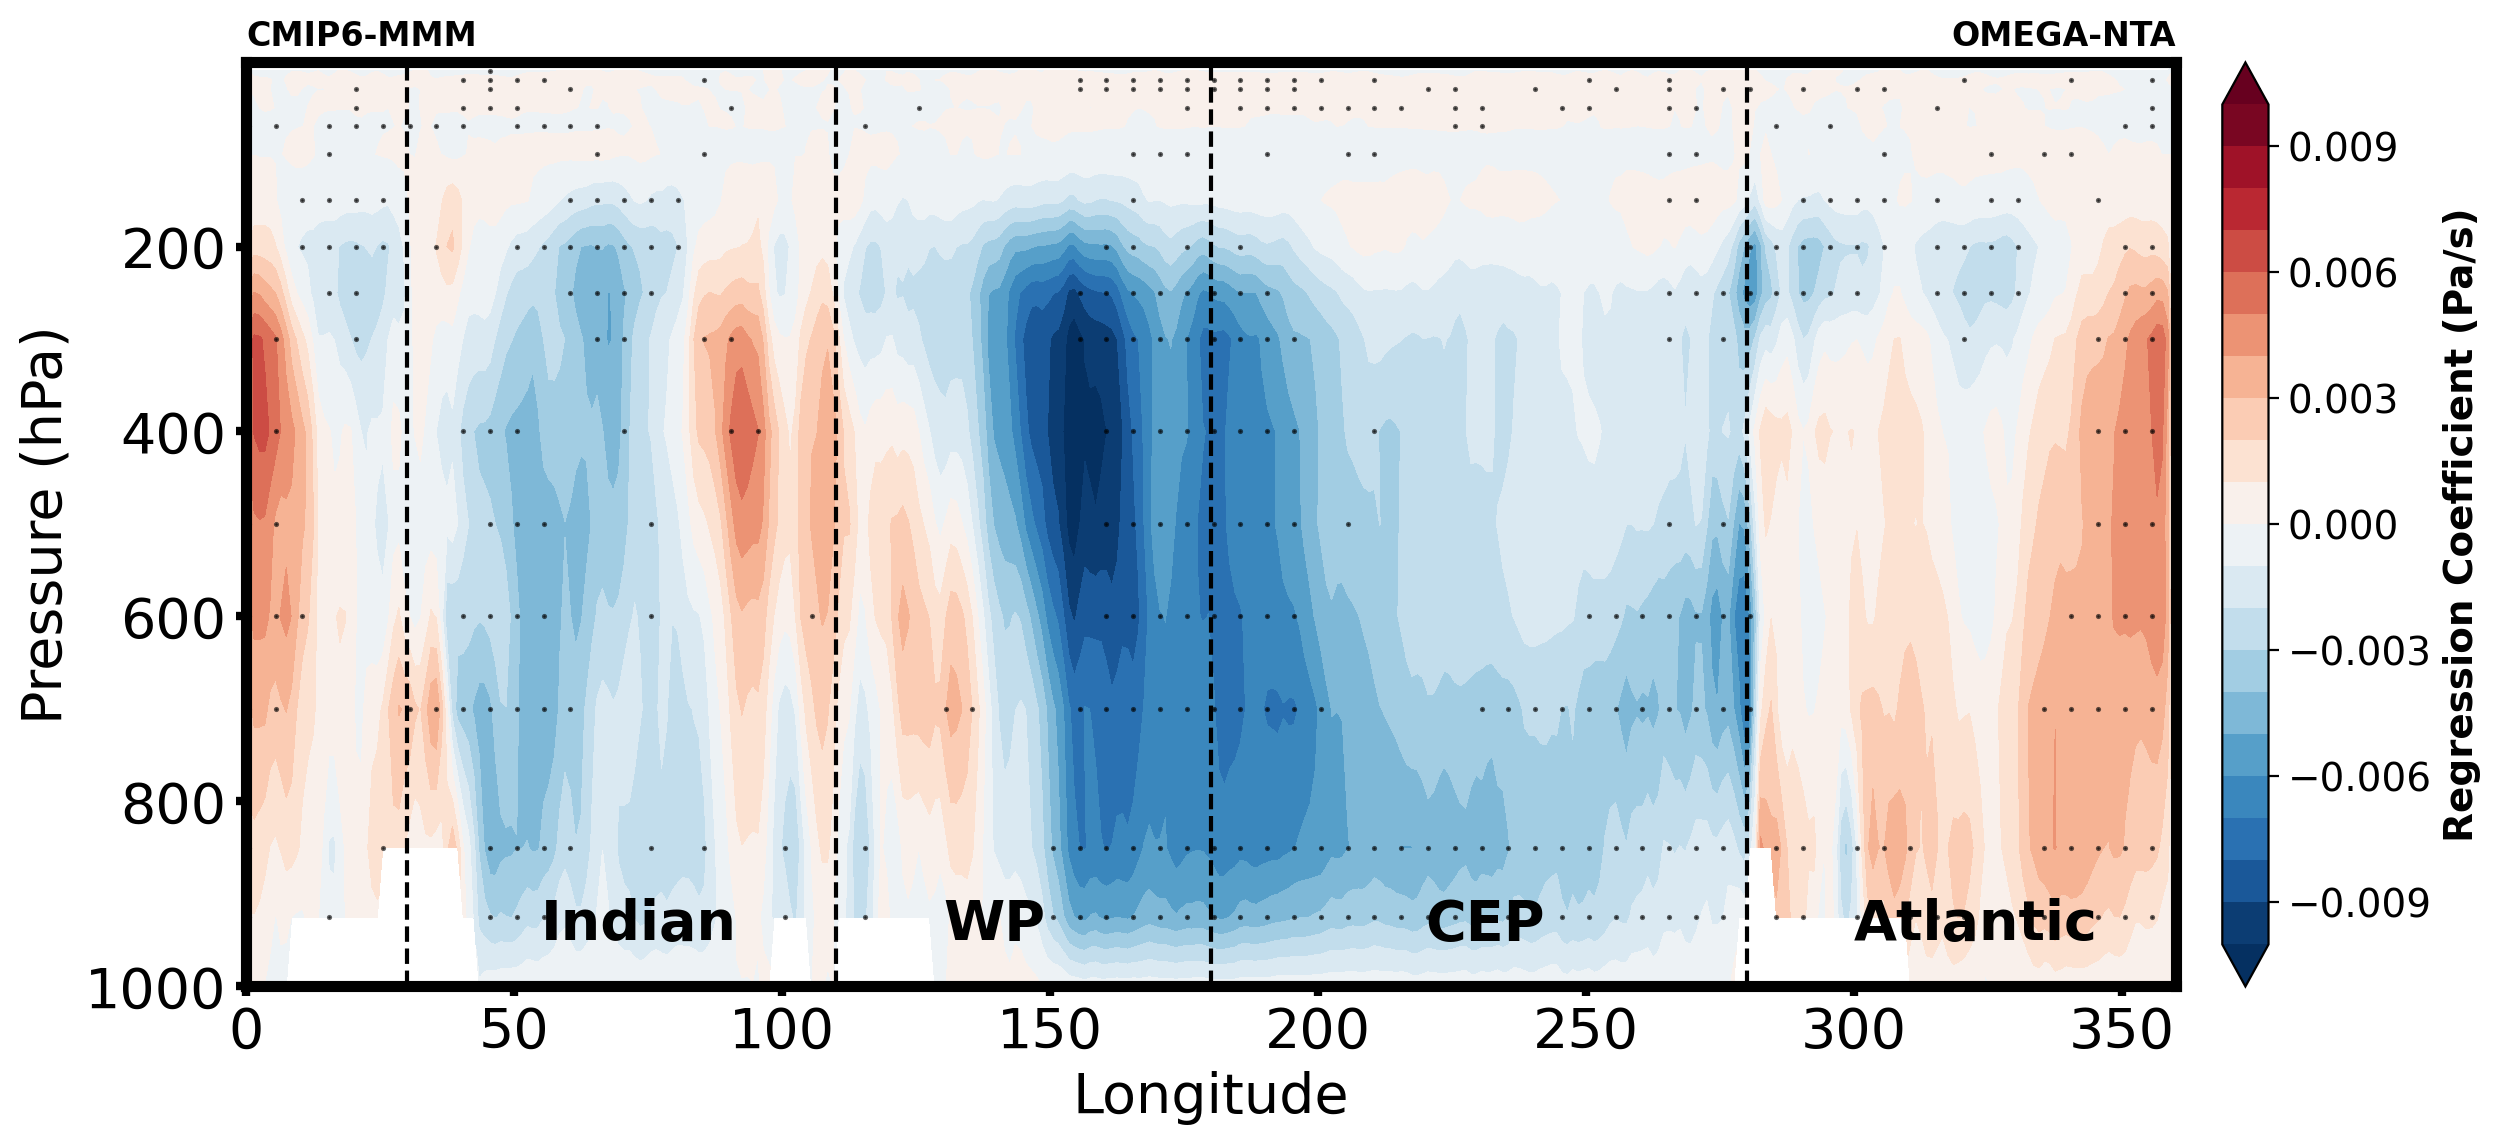

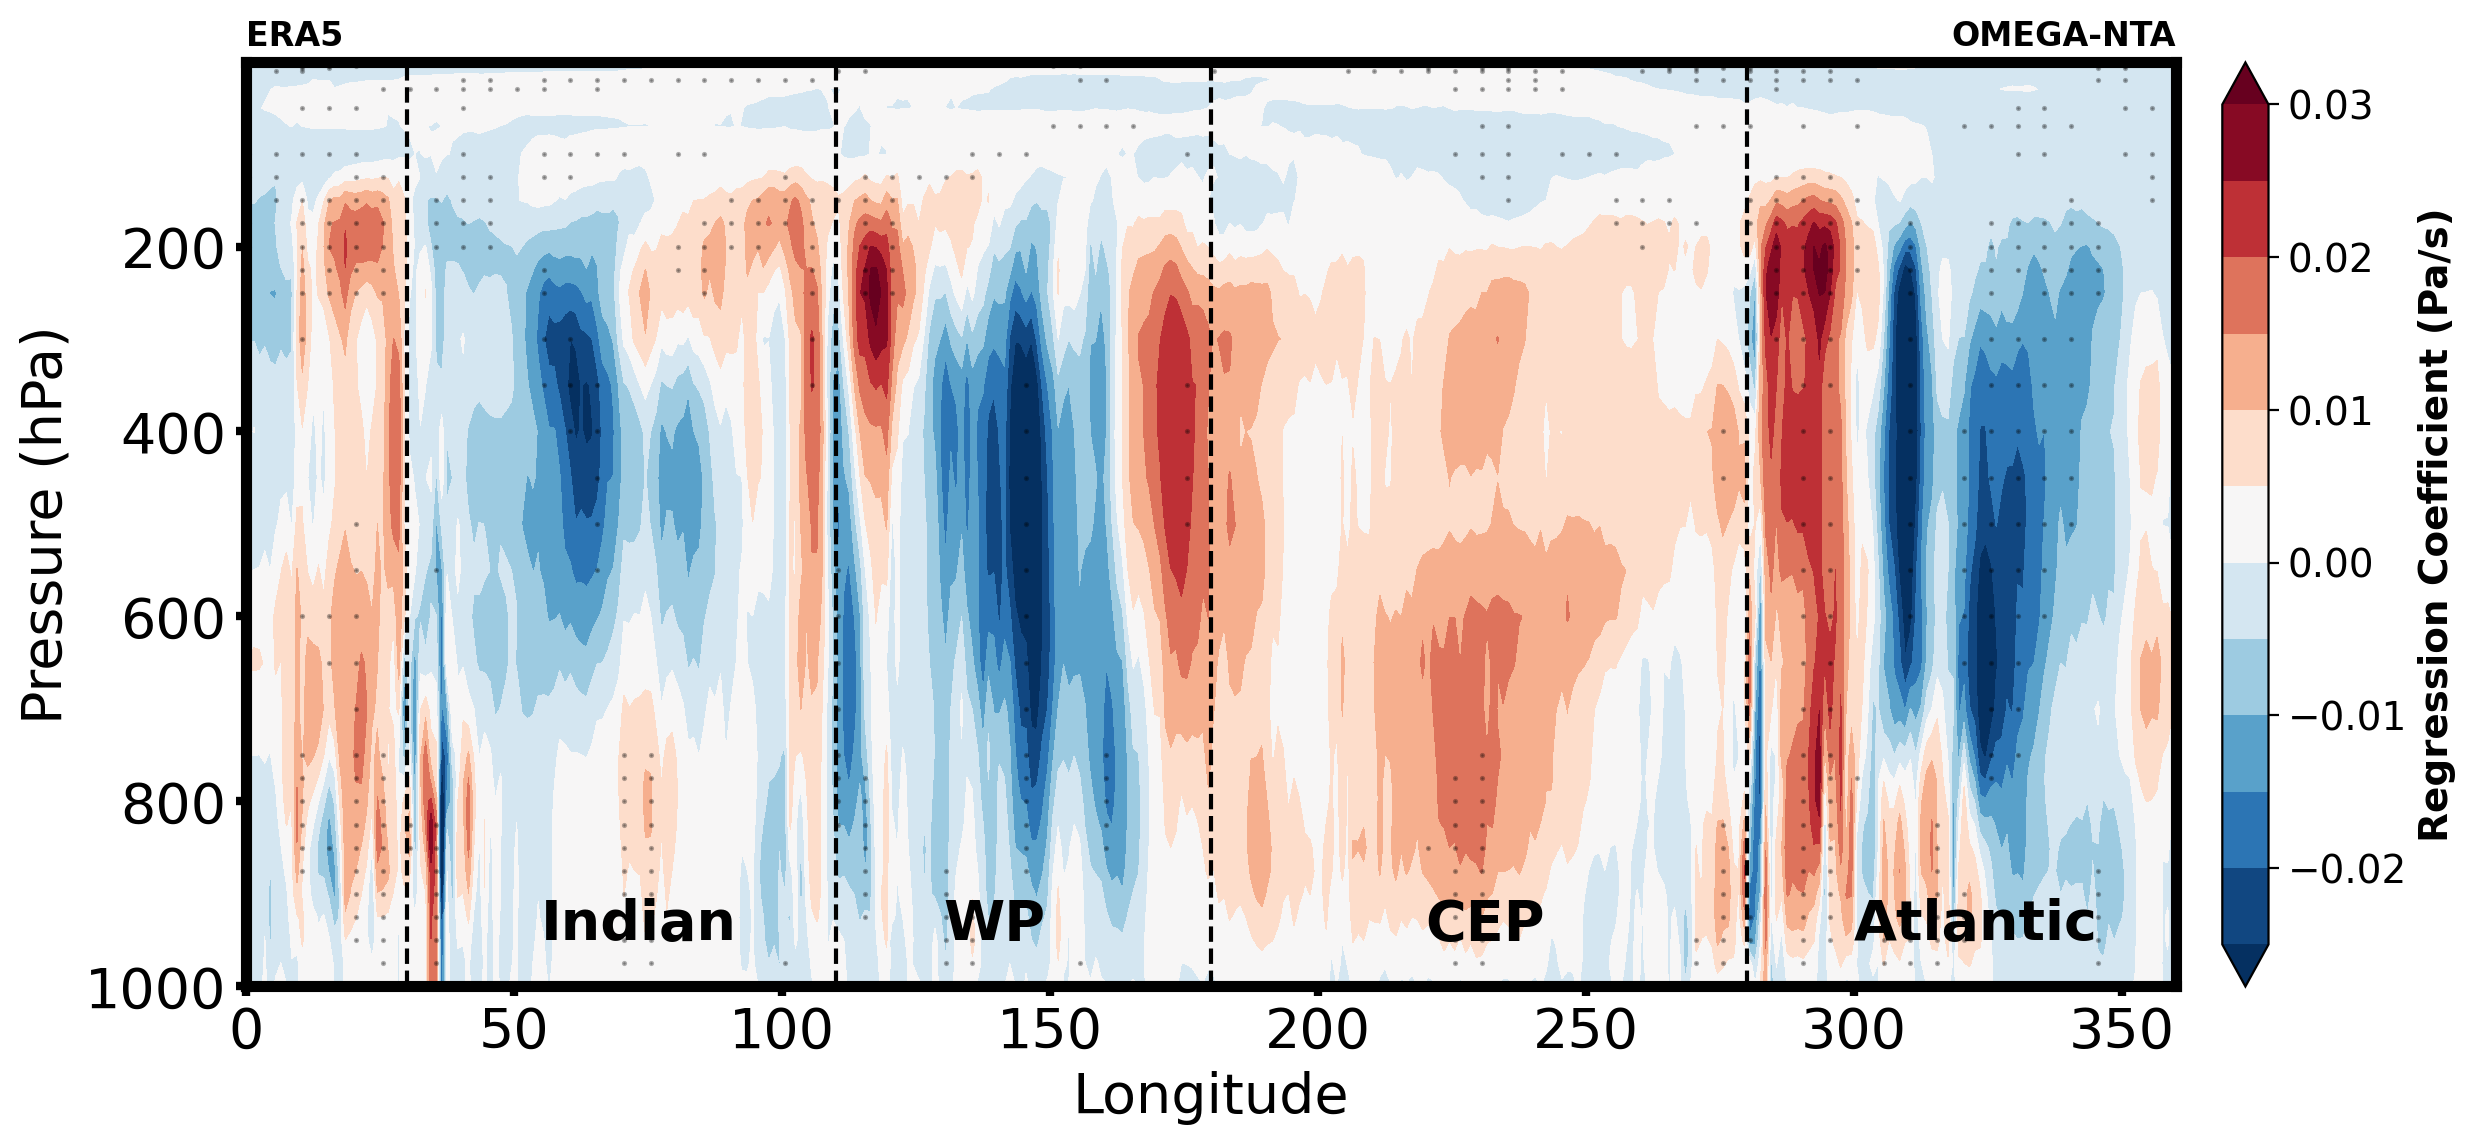

In [18]:
plot_wind_profile_cmip(lpf_cmip_mmm_omega_nta, left_title='CMIP6-MMM', right_title='OMEGA-NTA', vmin=-0.01, vmax=0.01, interval=0.001, threshold=0.621489)
plot_wind_profile(regression_omega_ano_nta['ERA5'], left_title='ERA5', right_title='OMEGA-NTA', vmin=-0.025, vmax=0.025, interval=0.005, threshold=0.621489)

##  CTI

In [19]:
# now load cti_index and do the same thing
cti_index = load_from_pickle(SSTA_INDEX_PATH + 'cti_ssta.pkl')
lpf_cmip_ano_omega = load_from_pickle('/pscratch/sd/y/yanxia/ENSO-CLOUD/CMIP6/CMIP_MERGE/Pangeo_Preprocessed/OMEGA_ANOMALY/lpf_cmip_ano_omega.pkl')


model_names = [model.split('.')[0] for model in list(lpf_cmip_ano_omega.keys())]

# Create a dictionary to hold the regression results for each model
regression_omega_ano_cti = {}

# Loop over each model and calculate the regression
for model, cti_ds, omega_ano_ds in zip(lpf_cmip_ano_omega.keys(), 
                                 cti_index['lpf_data'].values(), 
                                 lpf_cmip_ano_omega.values()):
    
    omega_ano_ds = omega_ano_ds.mean(dim='lat')
    model = model.split('.')[0] # get cmip model names
    if len(cti_ds.time) != len(omega_ano_ds.time):
        cti_ds = cti_ds.sel(time=slice('1955-01', '2009-11'))
                          
    print('Starting regression for', model)
    if model in ['ERA5']:
        regression_omega_ano_cti[model] = calculate_regression_vectorize(cti_ds.sel(time=slice('1955', '2009')), 
                                                            omega_ano_ds)
    else:
        regression_omega_ano_cti[model] = calculate_regression_vectorize(cti_ds, 
                                                                omega_ano_ds)




Starting regression for CESM2-WACCM
Starting regression for CESM2-WACCM-FV2
Starting regression for CESM2-FV2
Starting regression for CESM2
Starting regression for TaiESM1
Starting regression for GISS-E2-1-H
Starting regression for BCC-ESM1
Starting regression for NESM3
Starting regression for GISS-E2-1-G-CC
Starting regression for CanESM5
Starting regression for BCC-CSM2-MR
Starting regression for GISS-E2-1-G
Starting regression for MPI-ESM-1-2-HAM
Starting regression for MPI-ESM1-2-LR
Starting regression for NorESM2-MM
Starting regression for IITM-ESM
Starting regression for MRI-ESM2-0
Starting regression for CMCC-CM2-SR5
Starting regression for FGOALS-g3
Starting regression for ACCESS-CM2
Starting regression for MPI-ESM1-2-HR
Starting regression for CAMS-CSM1-0
Starting regression for AWI-ESM-1-1-LR
Starting regression for CMCC-ESM2
Starting regression for SAM0-UNICON
Starting regression for MIROC6
Starting regression for CMCC-CM2-HR4
Starting regression for E3SM-MMF
Starting regres

In [20]:
# Create ordered dictionary
regression_omega_ano_cti_ordered = {}

# First add observational data
if 'ERA5' in regression_omega_ano_cti:
    regression_omega_ano_cti_ordered['ERA5'] = regression_omega_ano_cti['ERA5']

# Add model data in descending order of Distance
for model in model_ranking['Unnamed: 0']:
    if model in regression_omega_ano_cti:
        regression_omega_ano_cti_ordered[model] = regression_omega_ano_cti[model]
# Replace original dictionary with ordered one
regression_omega_ano_cti = regression_omega_ano_cti_ordered

/tmp/ipykernel_1328783/3306679329.py:80: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


(<Figure size 6000x3000 with 31 Axes>,
 array([<AxesSubplot:title={'left':'ERA5','right':'OMEGA-CTI'}, xlabel='Longitude', ylabel='Pressure (hPa)'>,
        <AxesSubplot:title={'left':'CanESM5','right':'OMEGA-CTI'}, xlabel='Longitude'>,
        <AxesSubplot:title={'left':'E3SMv2','right':'OMEGA-CTI'}, xlabel='Longitude'>,
        <AxesSubplot:title={'left':'AWI-ESM-1-1-LR','right':'OMEGA-CTI'}, xlabel='Longitude'>,
        <AxesSubplot:title={'left':'CESM2-WACCM','right':'OMEGA-CTI'}, xlabel='Longitude'>,
        <AxesSubplot:title={'left':'MPI-ESM-1-2-HAM','right':'OMEGA-CTI'}, xlabel='Longitude'>,
        <AxesSubplot:title={'left':'ACCESS-CM2','right':'OMEGA-CTI'}, xlabel='Longitude', ylabel='Pressure (hPa)'>,
        <AxesSubplot:title={'left':'BCC-ESM1','right':'OMEGA-CTI'}, xlabel='Longitude'>,
        <AxesSubplot:title={'left':'IITM-ESM','right':'OMEGA-CTI'}, xlabel='Longitude'>,
        <AxesSubplot:title={'left':'MPI-ESM1-2-HR','right':'OMEGA-CTI'}, xlabel='Longitude'>,
     

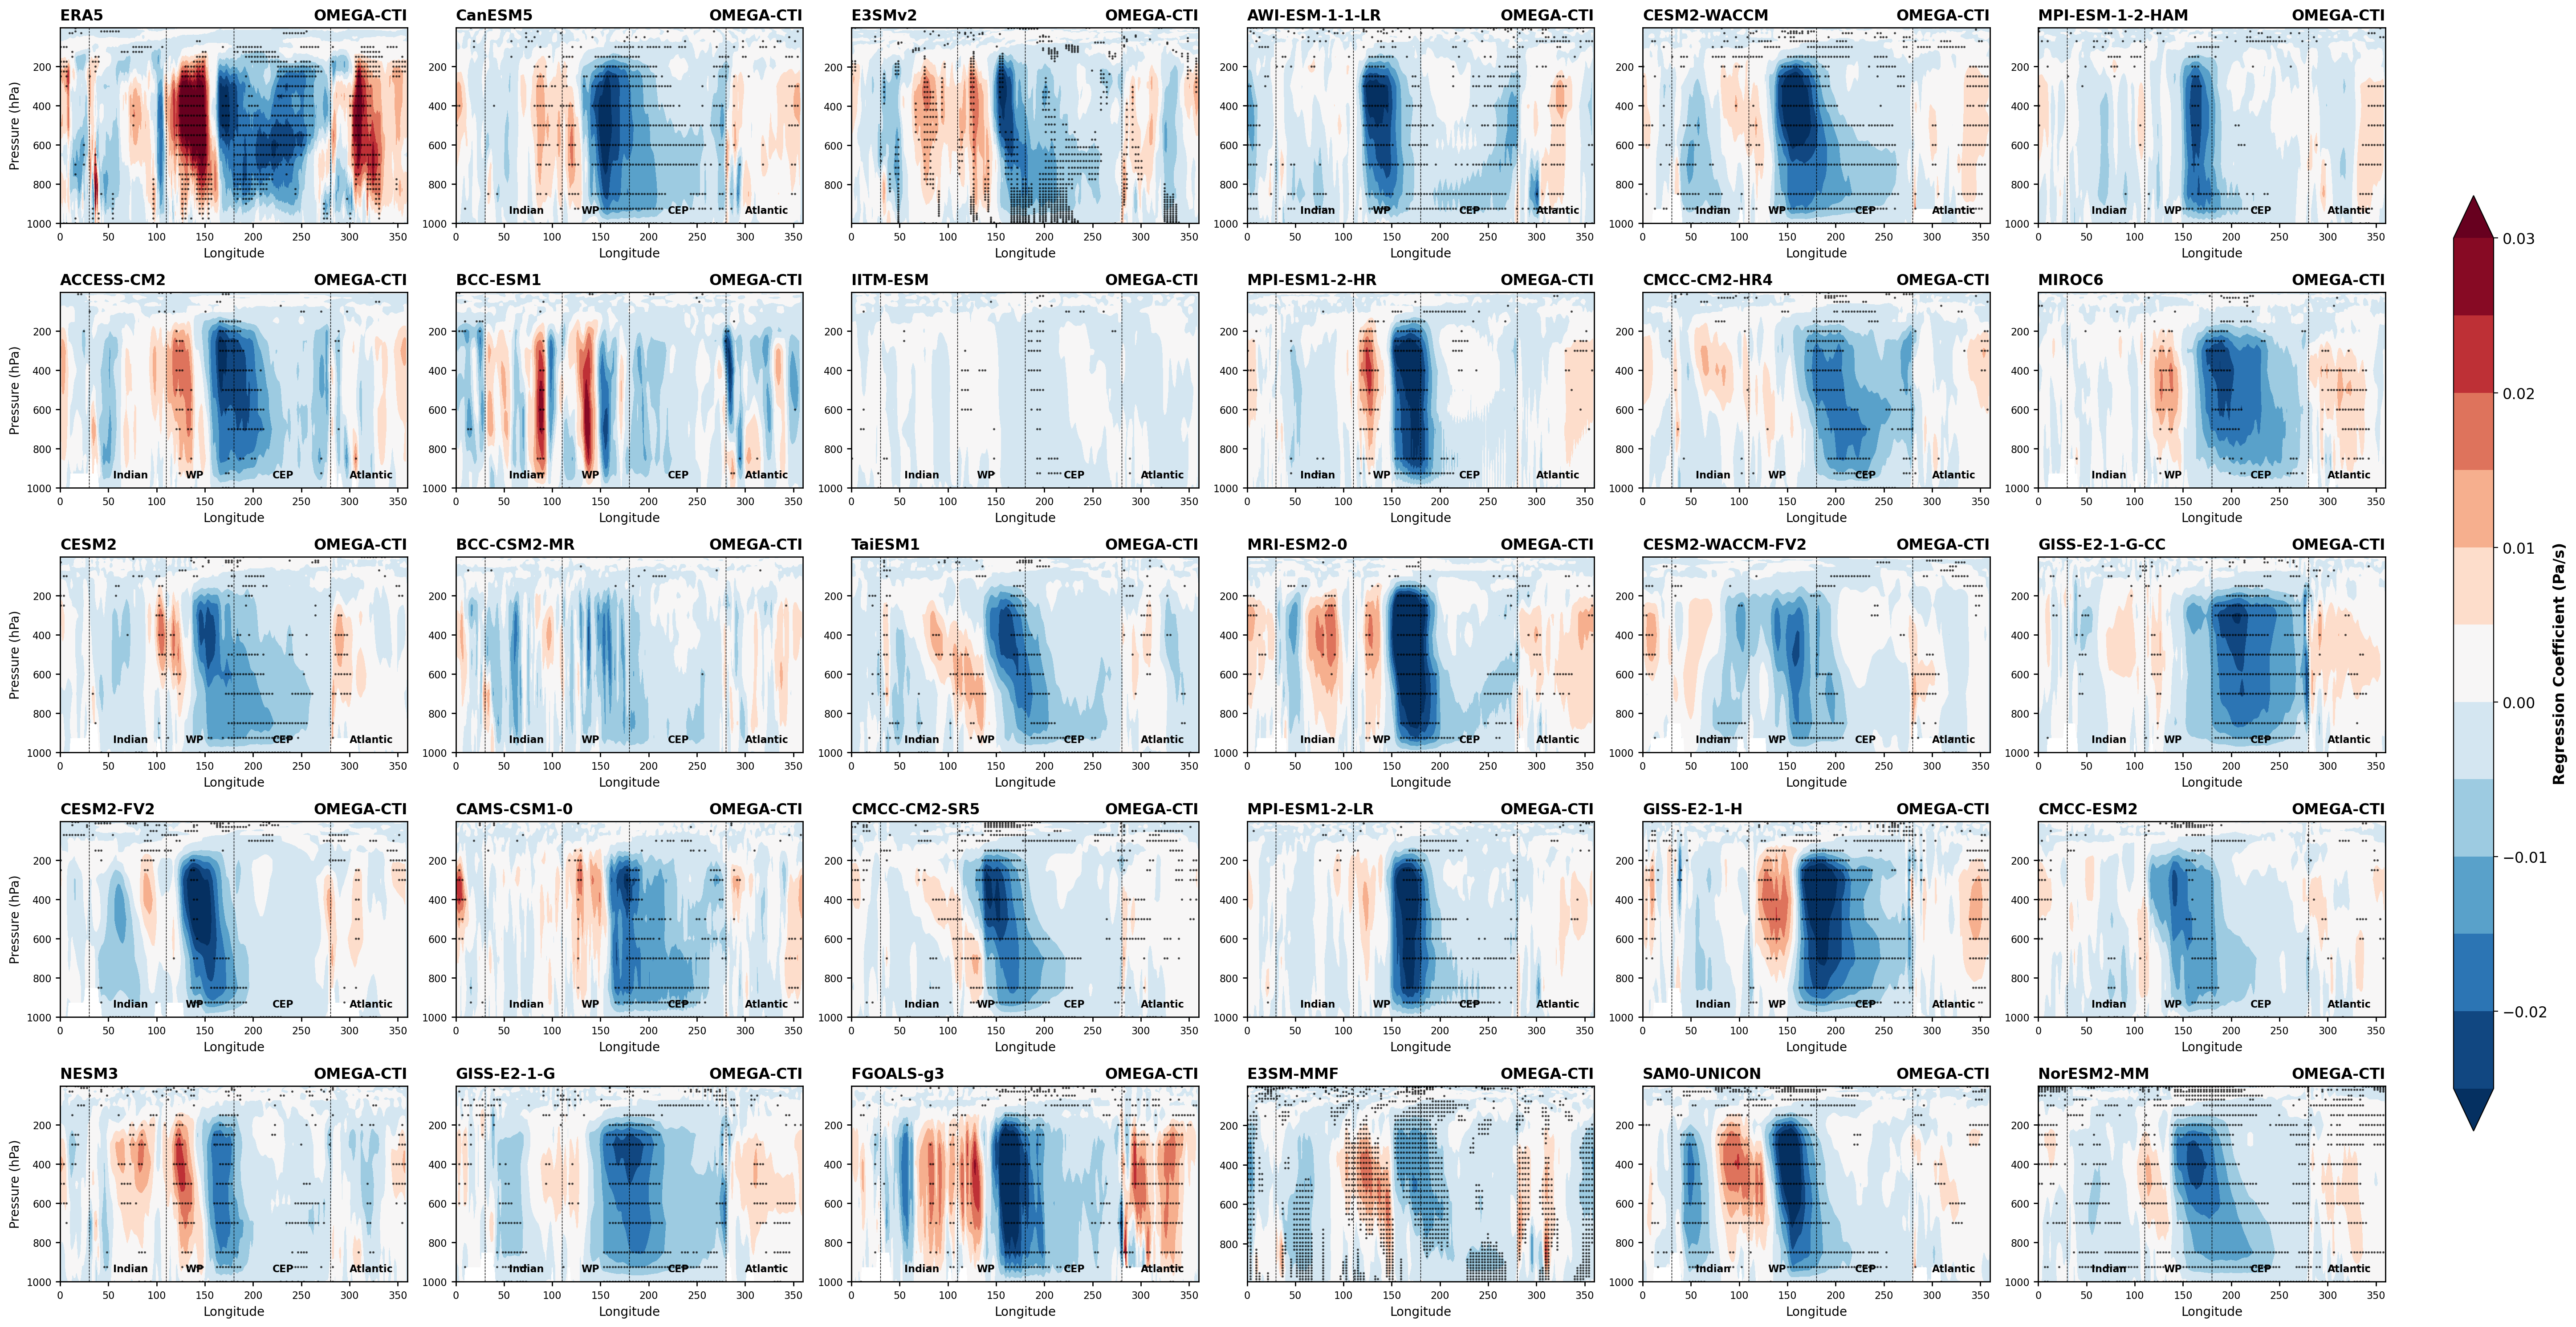

In [21]:
plot_wind_profile_all_cmip6(regression_omega_ano_cti, title='OMEGA-CTI', figure_name='paper_figures/Figure_S3_regression_omega_cti_cmip6.png')


### calculate the CMIP6 multi-model mean

In [22]:
lpf_cmip_mmm_omega = xr.zeros_like(regression_omega_ano_cti['ACCESS-CM2'])

for model, ds in regression_omega_ano_cti.items():
    if model in ['E3SM-MMF', 'E3SMv2', 'ERA5']:
        continue
    else:
        lpf_cmip_mmm_omega['slope'] += ds['slope'].values
lpf_cmip_mmm_omega = lpf_cmip_mmm_omega / (len(lpf_cmip_ano_omega.keys())-3)

regression_omega_ano_cti['CMIP6-MMM'] = lpf_cmip_mmm_omega
save_datasets_to_pickle(regression_omega_ano_cti, '/pscratch/sd/y/yanxia/ENSO-CLOUD/CMIP6/CMIP_MERGE/Pangeo_Preprocessed/OMEGA_ANOMALY/regression/regression_omega_ano_cti.pkl')


In [23]:

######################### Mask Threshold ##################################
r_threshold = 0.621489  # reference correlation based on the Pearson correlation table (df=780/120, alpha=0.1)

# Function to calculate the t-value and significance for CMIP-MMM
def calculate_significance(models_data):
    r_values = np.array([data['r_value'] for model, data in models_data.items() if model not in ['E3SM-MMF', 'E3SMv2', 'ERA5']])
    
    mean_correlation = np.mean(r_values, axis=0)
    std_dev = np.std(r_values, axis=0, ddof=1)
    n = len(r_values)
    standard_error = std_dev / np.sqrt(n)
    t_value = mean_correlation / standard_error
    degrees_of_freedom = n - 1
    alpha = 0.10
    critical_t_value = stats.t.ppf(1 - alpha / 2, degrees_of_freedom)
    significance_mask = abs(t_value) > critical_t_value
    return significance_mask

# Calculate significance mask for CMIP-MMM
cmip_mmm_significance_mask = calculate_significance(regression_omega_ano_cti)

# create the grid points
lons, levs = np.meshgrid(lpf_cmip_mmm_omega['lon'], lpf_cmip_mmm_omega['plev'])

# create the xarray.Dataset to save the significance mask
significance_mask_ds = xr.Dataset(
    {
        "significance_mask": (["plev", "lon"], cmip_mmm_significance_mask)
    },
    coords={
        "lon": lpf_cmip_mmm_omega['lon'],
        "lev": lpf_cmip_mmm_omega['plev']
    }
)


/tmp/ipykernel_1328783/1160198734.py:12: RuntimeWarning: invalid value encountered in divide
  t_value = mean_correlation / standard_error


In [24]:
def plot_wind_profile_cmip(ds, left_title='CMIP6-MMM', right_title='OMEGA-CTI', vmin=-0.01, vmax=0.01, interval=0.001, threshold=0.621489):
    fig, ax = plt.subplots(figsize=(15, 6), dpi=200)
    if 'plev' in ds.dims:
        ds = ds.rename({'plev': 'lev'})
        ax.yaxis.set_major_formatter(plt.FuncFormatter(convert_to_hPa))
        # if cmip model, please make the y-axis pressure in hPa
        ax.yaxis.set_major_formatter(plt.FuncFormatter(convert_to_hPa))
        y_position = 950*100
        ax.text(55, y_position, 'Indian', fontsize=20, fontweight='bold')
        ax.text(130, y_position, 'WP', fontsize=20, fontweight='bold')
        ax.text(220, y_position, 'CEP', fontsize=20, fontweight='bold')
        ax.text(300, y_position, 'Atlantic', fontsize=20, fontweight='bold')
    else:
        # if reanalysis,do not change the y-axis pressure
        y_position = 950
        ax.text(55, y_position, 'Indian', fontsize=20, fontweight='bold')
        ax.text(130, y_position, 'WP', fontsize=20, fontweight='bold')
        ax.text(220, y_position, 'CEP', fontsize=20, fontweight='bold')
        ax.text(300, y_position, 'Atlantic', fontsize=20, fontweight='bold')
        
    levels = np.arange(vmin, vmax+interval, interval)
    cf = ax.contourf(ds['lon'], ds['lev'], ds['slope'].values, cmap='RdBu_r', levels=levels, extend='both')
    # please plot all the values in the levels, not use contourf, use imshow

    cbar = plt.colorbar(cf, ax=ax, pad=0.02, extend='both')
    cbar.ax.tick_params(labelsize=14)  # Set colorbar label size
    # cbar.set_label('Correlation Coefficient', fontsize=14, fontweight='bold') 
    cbar.set_label('Regression Coefficient (Pa/s)', fontsize=14, fontweight='bold') 
    plt.title(left_title, loc='left', fontweight='bold')
    plt.title(right_title, loc='right',fontweight='bold')


    ax.axvline(30, color='k', linestyle='--')
    ax.axvline(110, color='k', linestyle='--')
    ax.axvline(180, color='k', linestyle='--')
    ax.axvline(280, color='k', linestyle='--')


    ax.set_xlabel('Longitude', fontsize=20)
    ax.set_ylabel('Pressure (hPa)', fontsize=20)

    # ax.set_ylim(0, 1000)
    ax.invert_yaxis()
    # ax.grid(True)
    # please make the ticks width larger, linewidth=2
    ax.tick_params(axis='both', which='major', labelsize=20, width=3)
    ax.tick_params(axis='both', which='minor', labelsize=20, width=3)

    ax.set_xlim(0, 360)
    # please make the edge of the axis thicker and value text larger

    # make the x-axis number larger
    ax.xaxis.set_tick_params(width=3)
    ax.yaxis.set_tick_params(width=3)

    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(4)
    

    # please implement a function to the significant dots based on the r_threshold
    # which the mask region is (lon lev) region, meaning the significant dots are in the (lon, lev) space
    plot_significant_dots_cmip_mmm(ax, significance_mask_ds)

# Function to create significant mask and plot the dots for CMIP_MMM
def plot_significant_dots_cmip_mmm(ax, ds):
    lons, levs = np.meshgrid(ds['lon'], ds['plev'])
    significant_mask = ds['significance_mask']
    thinning_factor_lon = 5
    thin_mask = significant_mask[:, ::thinning_factor_lon]
    thin_lons = lons[:, ::thinning_factor_lon]
    thin_levs = levs[:, ::thinning_factor_lon]
    ax.scatter(thin_lons[thin_mask], thin_levs[thin_mask],
                color='k', marker='.', s=3, alpha=0.6)

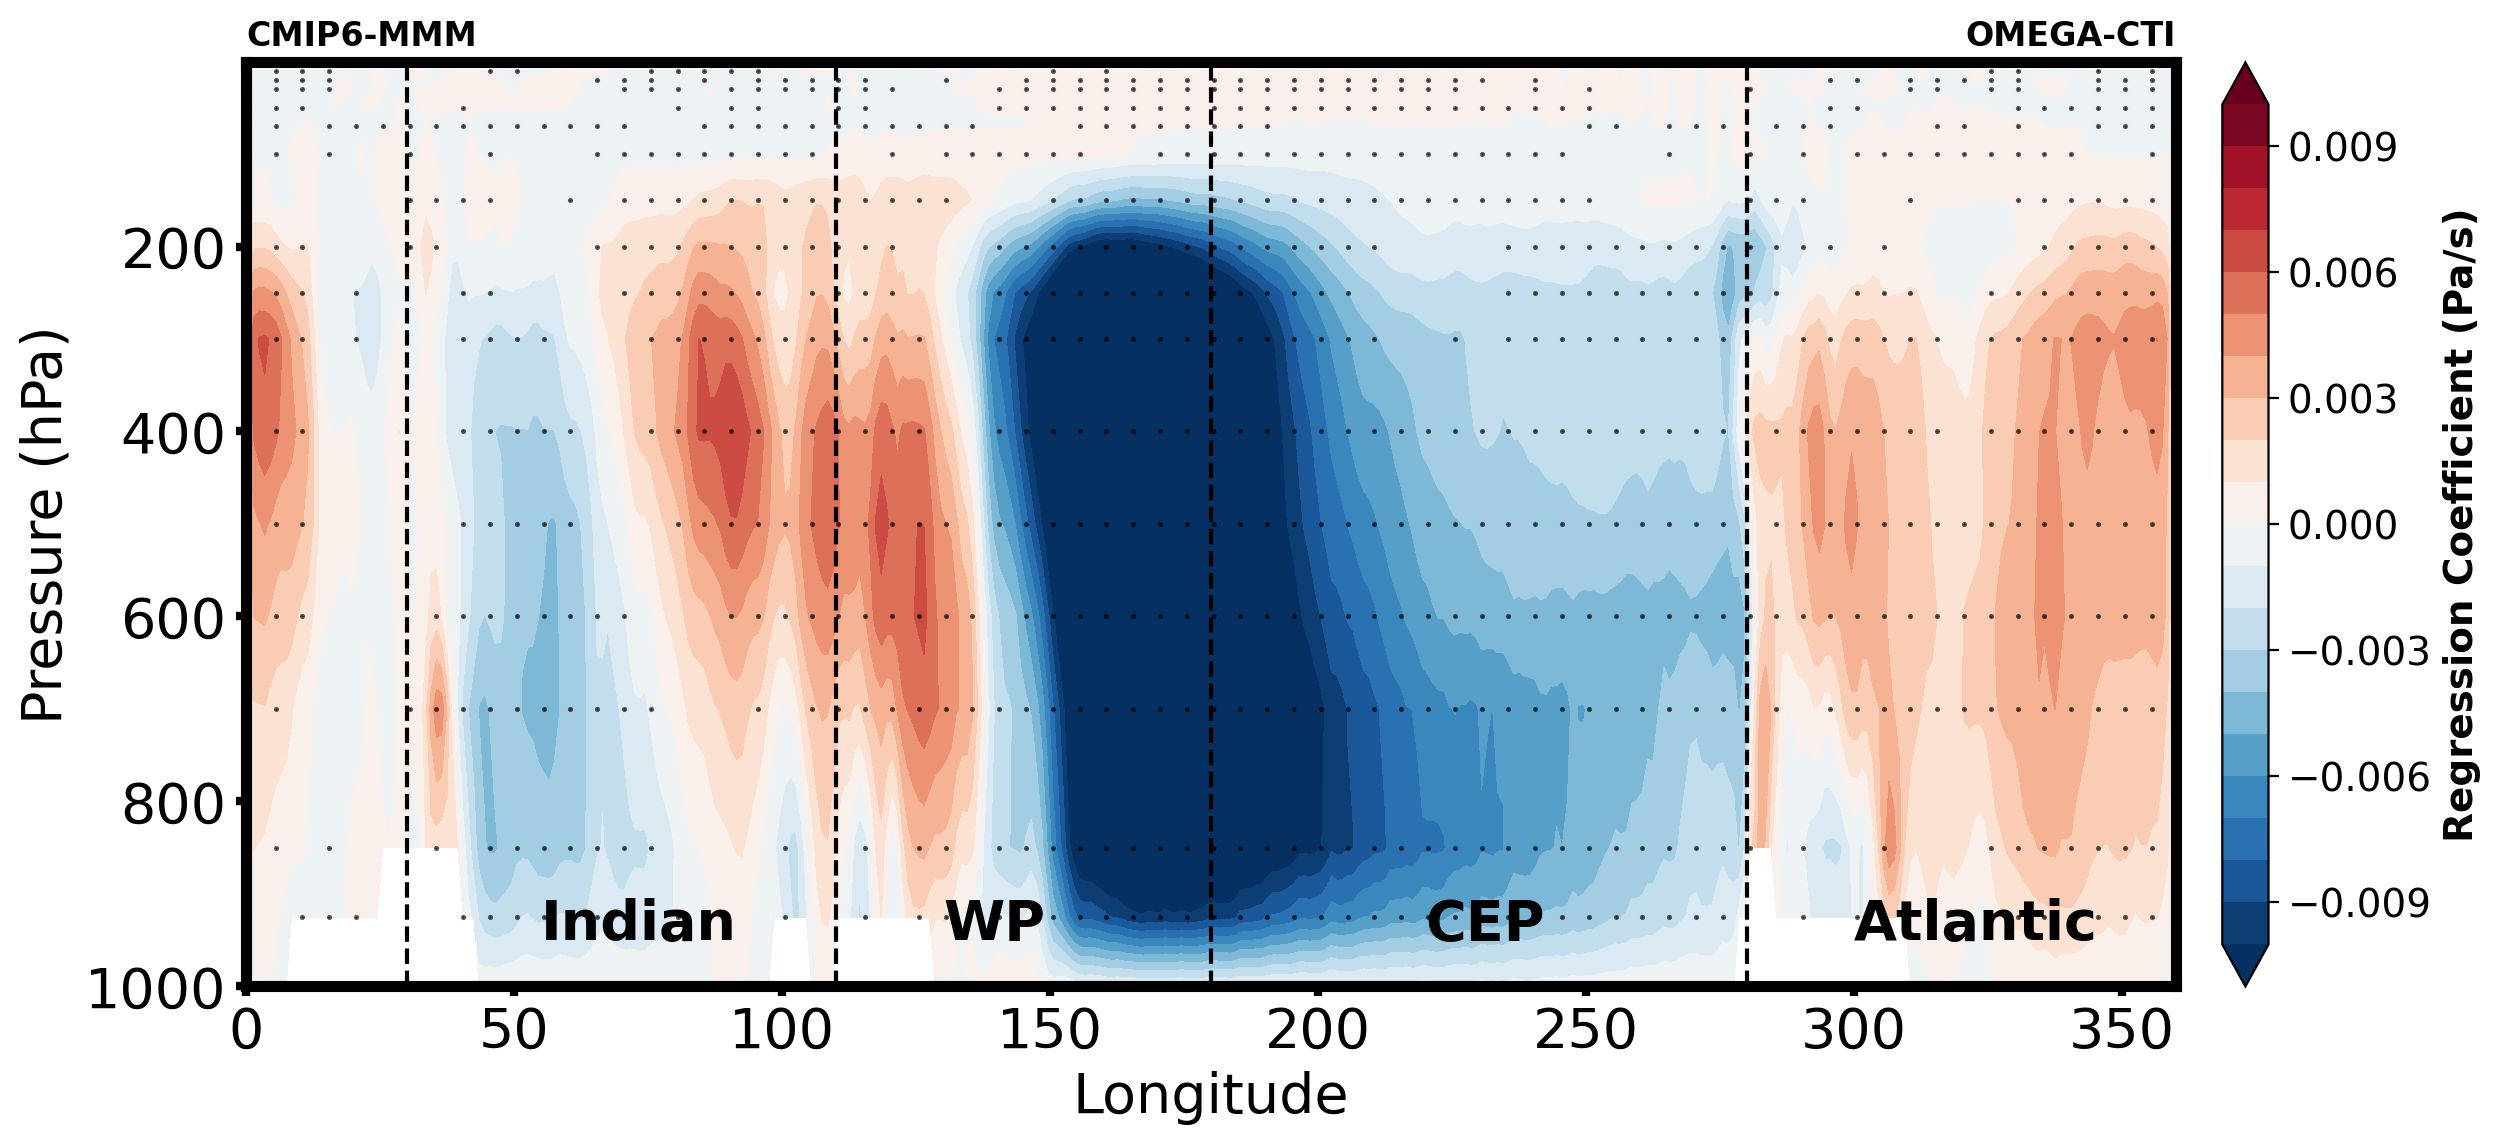

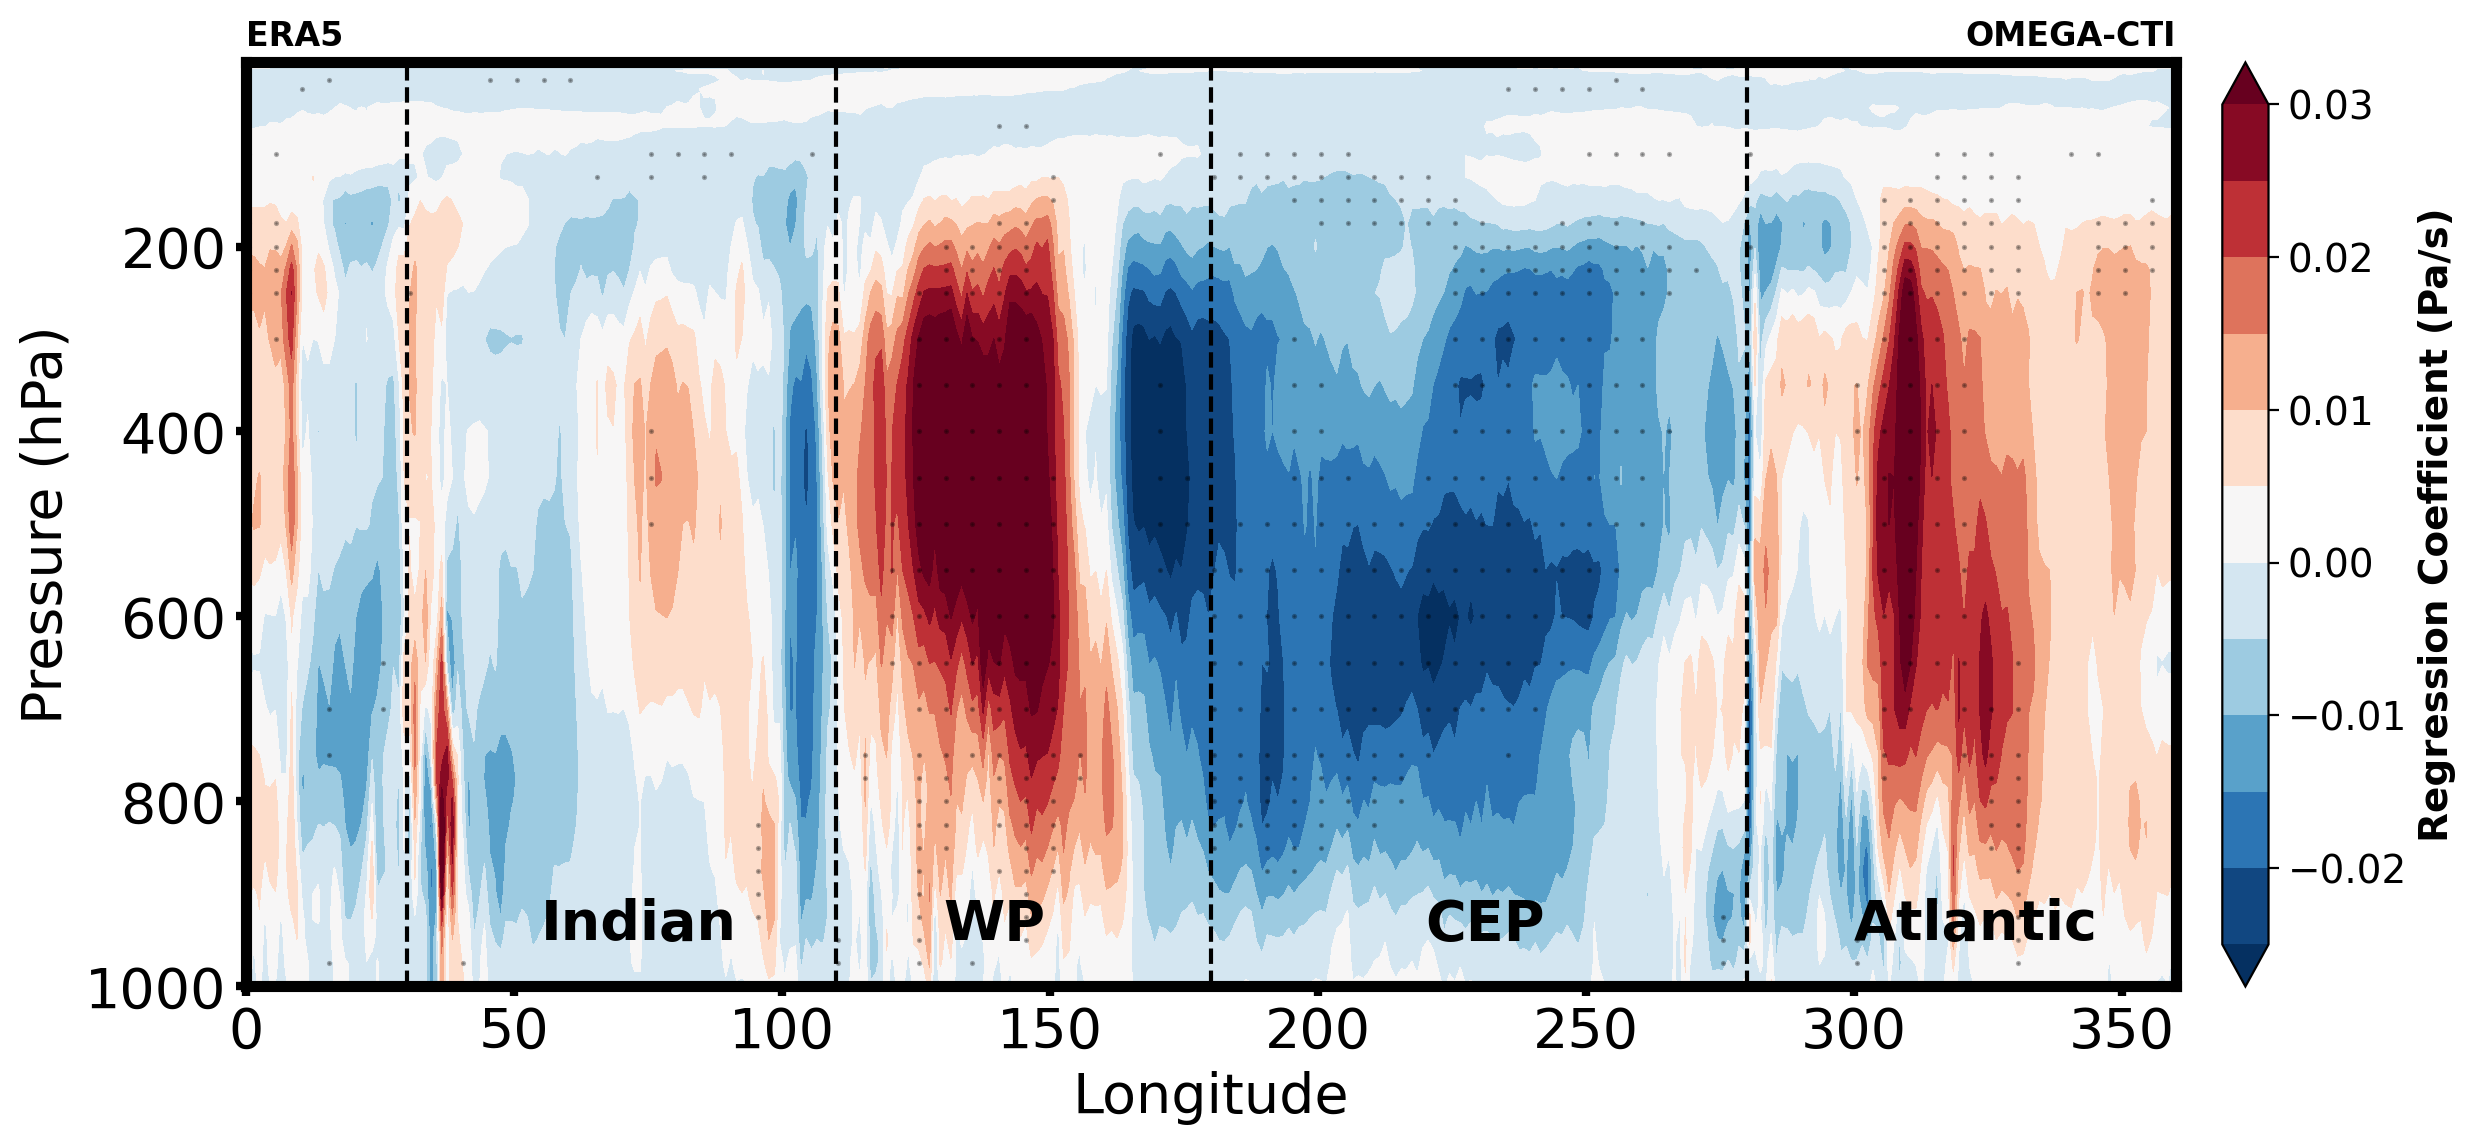

In [25]:
plot_wind_profile_cmip(lpf_cmip_mmm_omega, left_title='CMIP6-MMM', right_title='OMEGA-CTI', vmin=-0.01, vmax=0.01, interval=0.001, threshold=0.621489)
plot_wind_profile(regression_omega_ano_cti['ERA5'], left_title='ERA5', right_title='OMEGA-CTI', vmin=-0.025, vmax=0.025, interval=0.005, threshold=0.621489)
